Date: october 2022 

Goal: 
For RNA data
1.Genes Signature Score


Introduction to scanpy: https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html

In [1]:
import scanpy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import os
import sys
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns 

In [4]:
import gzip
import loompy as lp

In [5]:
from matplotlib.pyplot import imshow
%matplotlib inline

In [6]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi= 80)

scanpy==1.8.2 anndata==0.8.0 umap==0.5.3 numpy==1.21.6 scipy==1.9.3 pandas==1.5.2 scikit-learn==1.1.3 statsmodels==0.13.5 python-igraph==0.10.4 louvain==0.8.0 pynndescent==0.5.8


In [7]:
file_path='/oak/stanford/groups/cgawad/home/Cancer_Studies/SC_RNA_SEQ/ALSF_AML/scanpy/H5AD/'

In [9]:
Combo=sc.read_h5ad(file_path +"ALSF_AML_Combo_3500_with_raw_count.h5ad")

In [10]:
Combo.uns['log1p']["base"] = None

## Genes Signature Score

In [15]:
Combo.obs['Cell_Type_Sample'] = np.where(Combo.obs['batch'].isin (['0','1']),
                                         Combo.obs['Cell_Type'],
                                         Combo.obs['Sample'])

In [16]:
Combo.obs['lineage_Sample'] = np.where(Combo.obs['batch'].isin (['0','1']), 
                                       Combo.obs['lineage'], 
                                       Combo.obs['Sample'])

In [17]:
adata=Combo[np.logical_not(Combo.obs["lineage_Sample"].isin(['AML','AML-B',
                                                                    'AML-Ery',
                                                                    'AML-Mono',
                                                                    'AML-T']))]

In [60]:

AML=Combo[(Combo.obs["lineage"].isin(['AML','0_HSPC'])) | (Combo.obs["SampleType"].isin(['HealthyBM']))]


In [61]:
AML_2=AML[np.logical_not(AML.obs["lineage_Sample"].isin(['AML','AML-B',
                                                                    'AML-Ery',
                                                                    'AML-Mono',
                                                                    'AML-T',
                                                                    'B','Erythrocytes',
                                                                   'NK',
                                                                   'T',
                                                                   'Monocyte',
                                                                   'PlasmaB']))]

In [30]:
LSC_EPPERT=['ABCB1','ADGRG6','ALCAM','ANK3','ASXL1','ATP8B4','BAALC','BCL11A','BEX1','BTBD11',
            'C2orf69','CACNB2','CALN1','CD109','CFH','COL5A1','CRHBP','CRIM1','CYLD','DACH1',
            'DAPK1','DDX5','DLK1','DNAJB9','DRAM1','DST','DUSP6','EIF5','ELK3','EPC1','ERG',
            'FAM106A','FAM169A','FAM30A','FAM3C','FGD5','FLT3','FNBP1','FOXO1','FRMD4B','GCNT2',
            'GNL1','GUCY1A1','H2AC18','H2BC10','H2BC5','H2BC6','H2BC8','HES1','HLA-DRB4','HLF',
            'HOPX','HOXA5','HOXB2','HOXB3','HSP90B1','HTR1F','INPP4B','INSIG1','IPO11','ITSN2',
            'JUN','KAT6A','KBTBD8','KDM2A','KLF4','KMT2A','KSR1','LONP2','LPP','MAFK','MCTP1',
            'MECOM','MEIS1','MLLT3','MREG','MSI2','MSMO1','MYO5C','NPR3','OGT','OSER1','PAM',
            'PAN3-AS1','PCNX1','PDE10A','PLSCR4','PNISR','PNP','PPP1R16B','PRKCH','PROM1','PTK2',
            'RBM7','RBPMS','RCSD1','RGCC','RIMKLB','RLIM','RNF125','RPL31','RPS20P22','RSL1D1',
            'RUNX2','SEL1L3','SLC17A9','SLC25A36','SMARCA1','SMARCA2','SOCS2','SPINK2','SPTBN1',
            'ST3GAL6','TCEAL9','TCF12','TFPI',
            'TMEM107','TMEM200A','TMEM38B','TPT1','WDR91','YES1','ZBTB4','ZDHHC21','ZEB1','ZNF165'
    ]

In [31]:
HSC_list=[ 'NPR3','ANGPT1','MECOM','ATP8B4','SELENOP','CD34','HOPX',
          'BAALC','HPGDS','SLC45A3','RHEX','SPNS2','MYCN','SPINK2','PROM1',
          'HOXB6','CLEC3B','CDH4','CDH9','MALL','PARD3B','PDZRN4','FUT6',
          'PRSS2','RHBDF1','DLK1','MFAP4','ITGA2','TM4SF1','TMEM98','JCAD',
          'MMP7','MEIS1','MDK','NPDC1','ARHGEF17','RBPMS','SPARC','C1QTNF4',
          'PLAU','SHANK3','SVOPL','SH3D21','TCTEX1D1','OBSL1','ZNF521','KRT18',
          'SV2A','COL24A1','HOXA3','NOG','INPP4B','SCHIP1','GCSAML','TM4SF1',
          'DYTN','KIAA1549','SLC2A5','MMRN1','NBL1','MN1','MPL','DOCK1','RAMP1',
          'SLC18A2','MRC2','AIF1L','ITGA9','HOXB-AS3','HOXB3','CERCAM','C9orf43',
          'AC016735.1','RAB27B','TIE1','HTRA3','CAPN11','RXFP1','PADI3','FGF13' ]

In [32]:
sc.tl.score_genes(Combo,LSC_EPPERT, ctrl_size=50, 
                  gene_pool=None, n_bins=25, score_name='LSC_EPPERT_Score', 
                  random_state=0, copy=False, use_raw=None)

computing score 'LSC_EPPERT_Score'


/oak/stanford/groups/cgawad/Sequencing_Analysis_Tools/scRNA_py3.7/envs/pyscenic_3.8/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    'LSC_EPPERT_Score', score of gene set (adata.obs).
    806 total control genes are used. (0:00:06)


In [33]:
sc.tl.score_genes(Combo,HSC_list, ctrl_size=len(HSC_list), 
                  gene_pool=None, n_bins=25, score_name='HSC_Score', 
                  random_state=0, copy=False, use_raw=None)

computing score 'HSC_Score'


/oak/stanford/groups/cgawad/Sequencing_Analysis_Tools/scRNA_py3.7/envs/pyscenic_3.8/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    'HSC_Score', score of gene set (adata.obs).
    1195 total control genes are used. (0:00:04)


In [34]:
Combo

AnnData object with n_obs × n_vars = 96627 × 27346
    obs: 'n_genes', 'doublet_score', 'predicted_doublet', 'batch', 'Cytogenetic', 'Genetic subtype', 'FAB', 'SampleID', 'Age', 'Prognosis', 'Relapsed', 'Remission', 'SampleType', 'Sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'leiden', 'Cell_Type', 'lineage', 'S_score', 'G2M_score', 'phase', 'CD19_pos', 'CD274_pos', 'CD3_pos', 'CD33_pos', 'CD90_pos', 'CD10_pos', 'CD45RA_pos', 'CD123_pos', 'CD7_pos', 'CD49f_pos', 'CD25_pos', 'CD279_pos', 'CD32_pos', 'CD152_pos', 'CD366_pos', 'CD235ab_pos', 'CD127_pos', 'CD71_pos', 'CD36_pos', 'CD133_pos', 'clusters_for_interaction', 'LSC_EPPERT_Score', 'HSC_Score', 'LSC17_Score', 'Prognosis_Score', 'Relapse_Score', 'Cell_Type_Sample', 'lineage_Sample', 'Leu_stem_cell', 'LSC17', 'HSC_', 'Leu_stem_cell_top2000', 'LSC17_top2000', 'Poor_prognosis_top2000', 'Relapse_Score_top2000', 'HSC_Score_top20

In [35]:

LSC17_dictionary = {'Gene' : ['DNMT3B', 'ZBTB46', 'NYNRIN', 'ARHGAP22',  'LAPTM4B',
                              'MMRN1', 'DPYSL3' , 'FAM30A' , 'CDK6', 'CPXM1', 
                              'SOCS2', 'SMIM24', 'EMP1', 'CD34', 'AKR1C3', 
                                'ADGRG1', 'BEX3'],
                      'Weight' : [0.0874, -0.0347, 0.0865, -0.0138, 0.00582, 
                                  0.0258, 0.0284, 0.0196, -0.0704, -0.0258, 
                                  0.0271, -0.0226, 0.0146, 0.0338, -0.0402, 
                                  0.0501, 0.0465]

}

LSC17_df = pd.DataFrame.from_dict(LSC17_dictionary)

In [36]:

LSC47_dictionary = {'Gene' : ['DNMT3B', 'ZBTB46', 'NYNRIN', 'ARHGAP22',  'LAPTM4B',
                              'MMRN1', 'DPYSL3' , 'FAM30A' , 'CDK6', 'CPXM1', 
                              'SOCS2', 'SMIM24', 'EMP1', 'CD34', 'AKR1C3', 
                                'ADGRG1', 'BEX3'],
                      'Weight' : [0.0874, -0.0347, 0.0865, -0.0138, 0.00582, 
                                  0.0258, 0.0284, 0.0196, -0.0704, -0.0258, 
                                  0.0271, -0.0226, 0.0146, 0.0338, -0.0402, 
                                  0.0501, 0.0465]
}

LSC47_df = pd.DataFrame.from_dict(LSC47_dictionary)

In [37]:

ALSF51_dictionary = {'Gene' : ['PRSS2','NPDC1','TCTEX1D1','INPP4B','MMRN1',
                               'DOCK1','RAMP1','MRC2','ZNF385D','LOX',
                               'EFNA1','RHPN1','NECTIN2','FHL1','FUT7',
                               'AL034397.3','CCDC102A','EVPL','GNB5','BANK1',
                               'IER5L','TENT5A','MROH6','LTB4R2','FOSL1',
                               'HIST2H2BE','NOTCH1','LINC01684','SORBS3','CRIM1',
                               'ATP8A1','KCNMB4','TFPI','ITGA6','ZEB1',
                               'MED12L','FAM30A','CD109','LINC00963','LNCAROD',
                               'GOLGA8N','RTN2','MYO5C','TRBC2',
                               'LINC00926','IGHM','BPI','NETO2','AC009961.4',
                              'AC125603.2','NDST3'],
                      'Weight' : [0.3185148,0.3183613,0.4238882,0.3091209,0.3587167,
                                  0.3725419,0.3836662,0.3686095,0.4774381,0.3308891,
                                  0.3197336,0.3015227,0.6210886,0.3711796,0.3141412,
                                  0.3470166,0.3090241,-0.3198482,0.3123811,0.3894386,
                                  0.4568359,0.342895,0.3203509,0.3189661,0.3030501,
                                  0.3251306,0.353346,0.3806436,0.3283043,0.3857261,
                                  0.4291304,0.4041777,0.3325954,0.3775687,0.3368536,
                                  0.3651497,0.3530098,0.374894,0.4900046,0.3224527,
                                  0.3539741,0.3413327,0.3395651,0.4704764,
                                  -0.3151337,0.4154172,0.3687246,0.3623938,0.3792172,
                                  0.3178394,0.3303531]

}

ALSF51_df = pd.DataFrame.from_dict(ALSF51_dictionary)

In [38]:

ALSF_Relapse_dictionary = {'Gene' : ['TM4SF1','OBSL1','KRT18','SV2A','GCSAML',
                               'DYTN','DOCK1','MRC2','AIF1L','TIE1','LTC4S',
                               'ATL1','SMIM24','MAP1A','MEGF6','PIK3R6','AGAP2',
                               'GIPC1','ARSD','FAN1','TENT5A','NR1H3','MZB1',
                               'NOTCH1','ATP1B1','GOLGA8A','MYO18A','TCEAL1','ITGA6',
                               'NFIX','GMDS-DT','SOCS5','ZEB1','CYB561','CLU',
                               'GOLGA8N','JAG1','AC099489.1','SNAI3','LAMB2','DNAH1',
                               'STAC3','AC127502.2','SAP25','MYO5C','TNFRSF4',
                               'NT5E','ECHDC2','BIK','IGFBP2','AC244502.1'],
                      'Weight' : [0.5196712,0.4360933,0.6290281,0.4643127,0.5204558,
                                  0.4301126,0.5184643,0.4732098,0.4823885,0.4312799,0.6917252,
                                  0.496037,0.429274,0.4555271,0.4503557,0.4308521,0.5118528,
                                  0.4717027,0.5814693,0.4777605,0.5251029,0.4745338,0.4758036,
                                  0.5253459,0.4269928,0.5029996,0.4267341,0.5734156,0.4910456,
                                  0.4387391,0.443716,0.5517059,0.5291663,0.4466362,0.5364885,
                                  0.606178,0.5326241,0.4238102,0.4703903,0.5144846,0.4318808,
                                  0.5208072,0.5598661,0.4269655,0.5621091,0.4366067,
                                  0.5756734,0.5349513,0.4803637,0.4357072,0.4832744]

}

ALSF_Relapse_df = pd.DataFrame.from_dict(ALSF_Relapse_dictionary)

In [39]:
val= Combo.raw[:,'DNMT3B'].X.todense() * 0
for i in range(len(LSC17_df)):
    try:
        val= val+ Combo.raw[:,'{}'.format(LSC17_df.loc[i, 'Gene'])].X.todense() *LSC17_df.loc[i,'Weight']
    except KeyError:
        val= val+ 0

In [40]:
ALSF_Relapse_val=  0
for i in range(len(ALSF_Relapse_df)):
    try:
        ALSF_Relapse_val = ALSF_Relapse_val + Combo.raw[:,'{}'.format(ALSF_Relapse_df.loc[i, 'Gene'])].X.todense() * ALSF_Relapse_df.loc[i,'Weight']
    except KeyError:
        ALSF_Relapse_val = ALSF_Relapse_val + 0

In [41]:
ALSF51_val=  0
for i in range(len(ALSF51_df)):
    try:
        ALSF51_val = ALSF51_val + Combo.raw[:,'{}'.format(ALSF51_df.loc[i, 'Gene'])].X.todense() * ALSF51_df.loc[i,'Weight']
    except KeyError:
        ALSF51_val = ALSF51_val + 0

In [42]:
val_list = [item for sublist in val.tolist() for item in sublist]
ALSF51_list = [item for sublist in ALSF51_val.tolist() for item in sublist]
ALSF_Relapse_val = [item for sublist in ALSF_Relapse_val.tolist() for item in sublist]

In [43]:
Combo.obs['LSC17_Score']=val_list
Combo.obs['Prognosis_Score']=ALSF51_list
Combo.obs['Relapse_Score']=ALSF_Relapse_val

In [44]:
NCBI_df=pd.read_csv('/oak/stanford/groups/cgawad/home/Cancer_Studies/SC_RNA_SEQ/ALSF_AML/scanpy/NCBI_prognosis_score_validation_input.tsv',sep='\t')

In [45]:
NCBI_val= NCBI_df['DNMT3B'] * 0
for i in range(len(LSC17_df)):
    try:
        NCBI_val= NCBI_val+ NCBI_df['{}'.format(LSC17_df.loc[i, 'Gene'])]*LSC17_df.loc[i,'Weight']
    except KeyError:
        NCBI_val= NCBI_val+ 0

In [46]:
NCBI_ALSF51_val= 0
for i in range(len(ALSF51_df)):
    try:
        NCBI_ALSF51_val= NCBI_ALSF51_val+ NCBI_df['{}'.format(ALSF51_df.loc[i, 'Gene'])]* ALSF51_df.loc[i,'Weight']
    except KeyError:
        NCBI_ALSF51_val= NCBI_ALSF51_val+ 0

In [47]:
NCBI_ALSF_Relapse_val=  0
for i in range(len(ALSF_Relapse_df)):
    try:
        NCBI_ALSF_Relapse_val= NCBI_ALSF_Relapse_val+ NCBI_df['{}'.format(ALSF_Relapse_df.loc[i, 'Gene'])]* ALSF_Relapse_df.loc[i,'Weight']
    except KeyError:
        NCBI_ALSF_Relapse_val= NCBI_ALSF_Relapse_val+ 0

In [49]:
NCBI_df['LSC17_Score']=NCBI_val
NCBI_df['Prognosis_Score']=NCBI_ALSF51_val
NCBI_df['Relapse_Score']=NCBI_ALSF_Relapse_val

In [50]:
NCBI_df['HSC_Score']=NCBI_df[NCBI_df.columns.intersection(HSC_list)].mean(axis=1)

In [51]:
NCBI_df['LSC_EPPERT_Score']=NCBI_df[NCBI_df.columns.intersection(LSC_EPPERT)].mean(axis=1)

In [52]:
NCBI_df['Prognosis_Score']

0      -4.543146
1      -7.127960
2     -11.407175
3     -14.733824
4      -7.004000
         ...    
488    -8.945525
489     9.526405
490   -28.394020
491    12.039717
492   -13.352187
Name: Prognosis_Score, Length: 493, dtype: float64

In [53]:
NCBI_df2 = NCBI_df[["Sample","LSC17_Score","Prognosis_Score",'Relapse_Score',
                   'HSC_Score','LSC_EPPERT_Score' ]]

In [54]:
NCBI_df2.to_csv("NCBI_prognosis_score_validation_df_output.tsv",sep='\t')

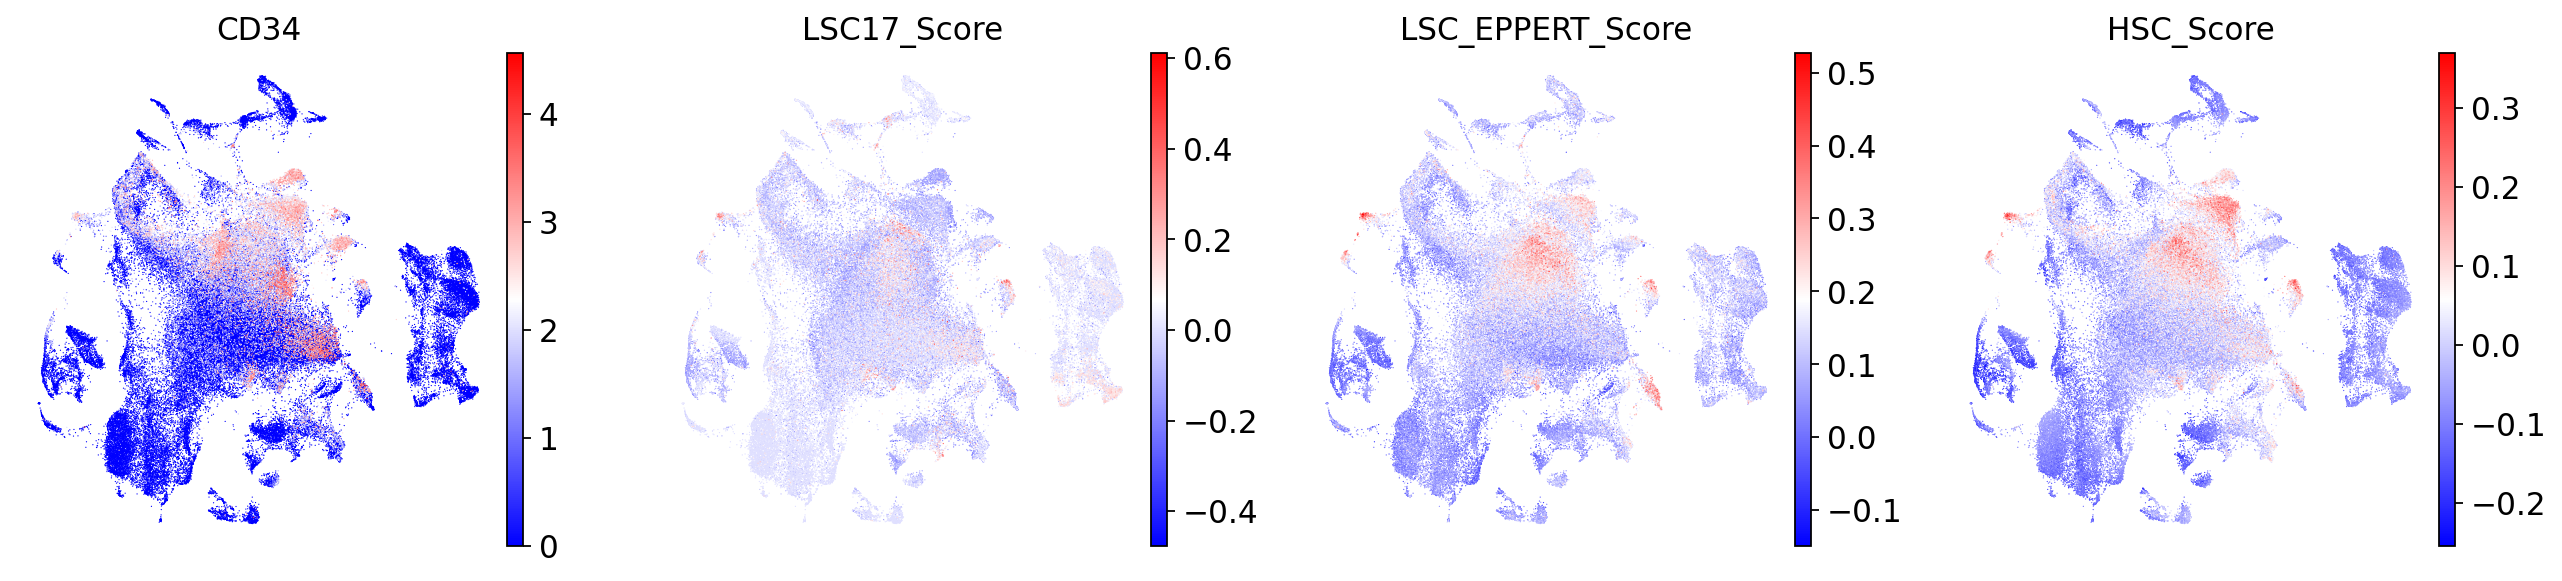

In [59]:
sc.pl.umap(Combo, color=['CD34','LSC17_Score','LSC_EPPERT_Score','HSC_Score'],cmap='bwr',
      legend_fontsize = 10,frameon=False,
          save='_ALSF_AML_Leu_Stem_Score.pdf') 

In [76]:
Combo.write(file_path + "ALSF_AML_Combo_3500_with_raw_count.h5ad")